## How well do jobs and skills pay for Data Analysts?

#### Import Libraries, Load Data, Clean Data

In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Filter for Job in the US, Drop NA Salaries, Top 6 Jobs

In [4]:
df_US = df[df['job_country'] == 'United States'].dropna(subset=['salary_year_avg'])

In [12]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

df_US_top6 = df_US[df_US['job_title'].isin(job_titles)]

job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index


#### Boxplot for Top 6 Roles in US

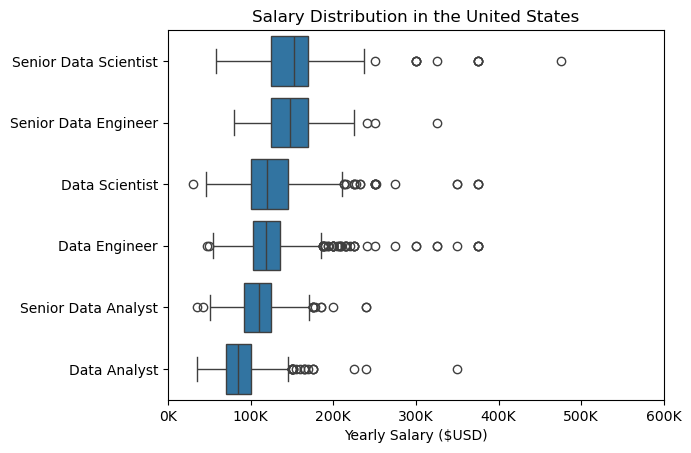

In [13]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.xlim(0, 600_000)
plt.show()

## Investigate Median Salary vs Skill for Data Analysts

#### Filter for US Data Analyst Roles, and Drop NA Salary Values

In [16]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] =='Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

#### Explode Job Skills for Analysis

In [19]:
#Top 10 paid skills for Data Analysts in the US
df_DA_US = df_DA_US.explode('job_skills')

df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [22]:
#Top 10 most requested skills for Data Analysts in the US
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values('median', ascending=False)

#### Graph Barplot

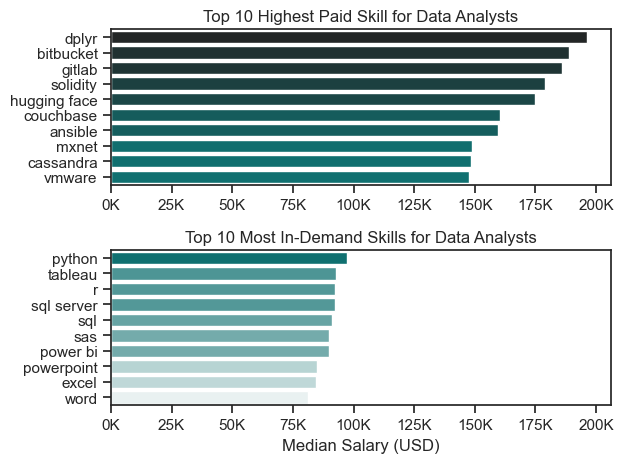

In [26]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skill for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:teal_r')

#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skill for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax[0].legend().remove()
# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:teal')

#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax[1].legend().remove()
plt.tight_layout()
plt.show()